<a href="https://colab.research.google.com/github/DSAlexRS/python/blob/master/MLzoomcamp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#looking data


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#EDA

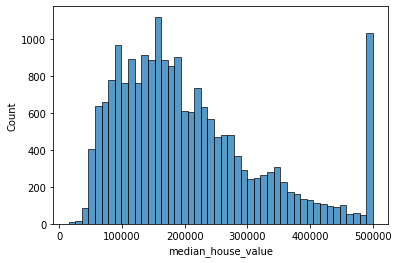

In [ ]:
sns.histplot(df["median_house_value"])

In [ ]:
df1 =  df.drop("ocean_proximity", axis=1)
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
a = df1.population.describe()
a

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [ ]:
a.iloc[5:6][0]

1166.0

#splitin data

In [ ]:
n = len(df1)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [ ]:
n, n_val, n_test, n_train

(20640, 4128, 4128, 12384)

In [ ]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)


In [ ]:
df_train = df1.iloc[idx[:n_train]]
df_val = df1.iloc[idx[n_train:n_train+n_val]]
df_test = df1.iloc[idx[n_train+n_val:]]

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [ ]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [ ]:
len(y_train), len(y_val), len(y_test)

(12384, 4128, 4128)

In [ ]:
df_train = df_train.drop("median_house_value", axis= 1)
df_val = df_val.drop("median_house_value", axis= 1)
df_test = df_test.drop("median_house_value", axis= 1)

In [ ]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

#Regresion


In [ ]:
base = list(df_train.columns)


In [ ]:
df_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [ ]:
X_train0 = df_train[base].fillna(0).values

In [ ]:
X_trainM = df_train
X_trainM["total_bedrooms"] = X_trainM["total_bedrooms"].fillna(X_trainM["total_bedrooms"].mean())
X_trainM = X_trainM.values

In [ ]:
X_train0 

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
w0_0, w_0 = train_linear_regression(X_train0, y_train)

y_pred_0 = w0_0 + X_train0.dot(w_0)

In [ ]:
y_pred_0

array([11.28055213, 11.90427911, 12.46507934, ..., 11.53259294,
       11.92377088, 12.54517195])

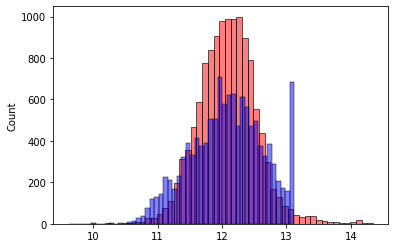

In [ ]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [ ]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [ ]:
round(rmse(y_train, y_pred_0),2)

0.34

In [ ]:
w0_M, w_M = train_linear_regression(X_trainM, y_train)

y_pred_M = w0_M + X_trainM.dot(w_M)

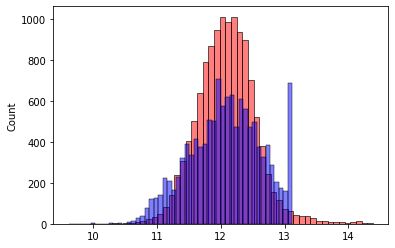

In [ ]:
sns.histplot(y_pred_M, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [ ]:
round(rmse(y_train, y_pred_M),2)

0.34

# Regularized linear regression



In [ ]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score,8))

0.0 -11.759590872680436 0.32901954
1e-05 -11.759428950174058 0.32901954
0.0001 -11.757971849086523 0.32901953
0.001 -11.743420667265212 0.32901939
0.1 -10.336279128505433 0.32919971
1 -4.946335110656922 0.33340342
10 -0.7936332757652793 0.34033331


#random seed

In [ ]:
def split(df, seed):
  np.random.seed(seed)
  np.random.shuffle(idx)
  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_val:]]
  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)
  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)
  df_train = df_train.drop("median_house_value", axis= 1)
  df_val = df_val.drop("median_house_value", axis= 1)
  df_test = df_test.drop("median_house_value", axis= 1)
  return df_train, y_train, df_val, y_val

In [ ]:
score = []
def save(df_train, y_train, df_val, y_val): 
  X_train = prepare_X(df_train)
  w0, w = train_linear_regression(X_train, y_train)
  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)
  rmse1 = rmse(y_val, y_pred)
  return rmse1

In [ ]:
score = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seeds:
  df_train, y_train, df_val, y_val = split(df1, seed)
  scoreS = save(df_train, y_train, df_val, y_val)
  score.append(scoreS)

In [ ]:
score

[0.3356488966190346,
 0.3393890110368421,
 0.34226192111904696,
 0.34414004687756117,
 0.3409237458492552,
 0.33527577109471807,
 0.34214414642061103,
 0.3394619924655678,
 0.34505590289393284,
 0.3459972686128678]

In [ ]:
round(np.std(score),5)

0.00347

#final

In [ ]:
n = len(df1)

n_val = int(n * 0.2)
n_test = int(n * 0)
n_train = n - n_val - n_test
idx = np.arange(n)
df_trainF, y_trainF, df_valF, y_valF = split(df1,9)

In [ ]:
X_trainF = prepare_X(df_trainF)
w0, w = train_linear_regression_reg(X_trainF, y_trainF, r=0.001)
X_valF = prepare_X(df_val)
y_pred = w0 + X_valF.dot(w)
score = rmse(y_val, y_pred)

In [ ]:
score

0.34596664836517943

#Answers
Q1. 207 
Q2. 1166
Q3. Both are equally good
Q4. 0.001 
Q5. 0.003
Q6. 0.35